**EE-411 Homework 2 : Classifying digits & learning theory**

*Name : Palmisano*

*First Name : Fabio Nicola Edouard*

*Sciper = 296708*


**Part 1 : Classifying digits with Scikit-learn**

In [216]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC




In [217]:
#In order to don't have a lot of warning that make our code very unreadable we use the ignore of convergence warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

*1) Import and prepare the data :*

In [218]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

We did the loading of the data as describe in the homework description, and now we will just check the sape of the data (X) that we obtain and the labels (y)

In [219]:
print('The shape of the data (X) that we receive is :', X.shape)
print('The shape of the data (y) that we receive is :', y.shape)

The shape of the data (X) that we receive is : (1797, 64)
The shape of the data (y) that we receive is : (1797,)


<Figure size 640x480 with 0 Axes>

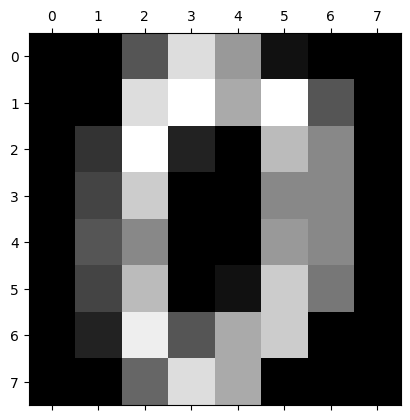

In [220]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [221]:
print(y)

[0 1 2 ... 8 9 8]


In [222]:
for i in range(len(y)): 
    if y[i] % 2 == 0 : 
        y[i] = 0
    else : 
        y[i] = 1

print(y)

[0 1 0 ... 0 1 0]


In [223]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.3, train_size = 0.7)

In [224]:
print('the size of train set is : ',x_train.shape)
print('the size of test set is : ', x_test.shape)

the size of train set is :  (1257, 64)
the size of test set is :  (540, 64)


In [225]:
print(f'The proportion of even number (0) in train set is is {(np.sum(y_train)/len(y_train))*100:.2f} %')
print(f'The proportion of odd number (1) in train set is is {(1-(np.sum(y_train)/len(y_train)))*100:.2f} %')


print('\n')

print(f'The proportion of even number (0) in test set is is {(np.sum(y_test)/len(y_test))*100:.2f} %')
print(f'The proportion of odd number (1) in test set is is {(1-(np.sum(y_test)/len(y_test)))*100:.2f} %')

The proportion of even number (0) in train set is is 49.64 %
The proportion of odd number (1) in train set is is 50.36 %


The proportion of even number (0) in test set is is 52.22 %
The proportion of odd number (1) in test set is is 47.78 %


We see that the both subsets have roughly the same proportion of labelled numbers.

**---------------------------------------------------EXO 1.2 -------------------------------------------------------------**

*2) Logistic Regression*

In [226]:
#LogReg with penalty l1
nbre_step = 50 
log_reg_l1 = LogisticRegression(penalty = 'l1',solver = 'liblinear')

parameters_logregl1 = {'C' :  1/np.logspace(-1,4,nbre_step)}

cv_logregl1 = GridSearchCV(log_reg_l1, parameters_logregl1, scoring = 'accuracy', cv = 5)
cv_logregl1.fit(x_train, y_train)

cvopt_logregl1 = cv_logregl1.best_estimator_
cvopt_logregl1.fit(x_train,y_train)

accuracy_logregl1 = cvopt_logregl1.score(x_test, y_test)



#LogReg with penalty l2
log_reg_l2 = LogisticRegression(penalty = 'l2',solver = 'liblinear')

parameters_logregl2 = {'C' :  1/np.logspace(-1,4,nbre_step)}

cv_logregl2 = GridSearchCV(log_reg_l2, parameters_logregl2, scoring = 'accuracy', cv = 5)
cv_logregl2.fit(x_train, y_train)

cvopt_logregl2 = cv_logregl2.best_estimator_
cvopt_logregl2.fit(x_train,y_train)

accuracy_logregl2 = cvopt_logregl2.score(x_test, y_test)


print(cvopt_logregl1)
print(f"The accuracy on the Test set is : {accuracy_logregl1*100:.5f}%")
print('\n')
print(cvopt_logregl2)
print(f"The accuracy on the Test set is : {accuracy_logregl2*100:.5f}%")


LogisticRegression(C=0.09102981779915217, penalty='l1', solver='liblinear')
The accuracy on the Test set is : 90.92593%


LogisticRegression(C=0.013894954943731375, solver='liblinear')
The accuracy on the Test set is : 90.55556%


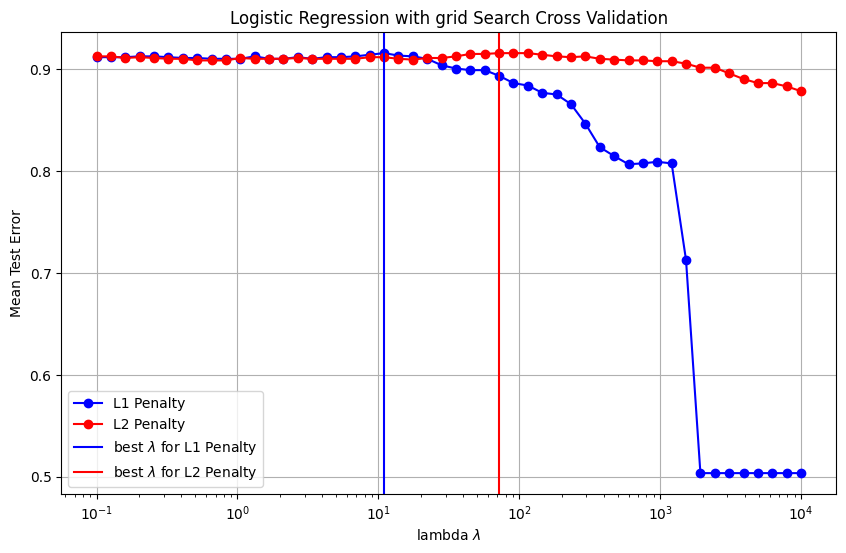

In [227]:
mean_test_l1 = cv_logregl1.cv_results_['mean_test_score']
mean_test_l2 = cv_logregl2.cv_results_['mean_test_score']

lambda_ = np.logspace(-1,4,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_test_l1, label='L1 Penalty', color = 'blue', marker = 'o')
plt.semilogx(lambda_, mean_test_l2, label='L2 Penalty',  color = 'red', marker = 'o')
plt.axvline(1/cv_logregl1.best_params_['C'], color = 'blue', label = 'best $\lambda$ for L1 Penalty')
plt.axvline(1/cv_logregl2.best_params_['C'], color = 'red', label = 'best $\lambda$ for L2 Penalty')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Logistic Regression with grid Search Cross Validation')
plt.grid()
plt.show()

**---------------------------------------------------EXO 1.3 -------------------------------------------------------------**

*3) Ridge Regression + SVM*

In [228]:

nbre_step = 50 
ridge = RidgeClassifier()

# Checking the documentation we have alpha = 1/(2C) but we know that C = 1/lambda so lambda = 2*alpha and we want ALPHA = LAMBDA/2

parameters_ridge = {'alpha' :  np.logspace(1,7,nbre_step)/2}

cv_ridge = GridSearchCV(ridge, parameters_ridge, scoring = 'accuracy', cv = 5)
cv_ridge.fit(x_train, y_train)

cvopt_ridge= cv_ridge.best_estimator_
cvopt_ridge.fit(x_train,y_train)

accuracy_ridge = cvopt_ridge.score(x_test, y_test)

print(cvopt_ridge)
print(f"The accuracy on the Test set is : {accuracy_ridge*100:.5f}%")
print('\n')

RidgeClassifier(alpha=1060.4754439600952)
The accuracy on the Test set is : 90.92593%




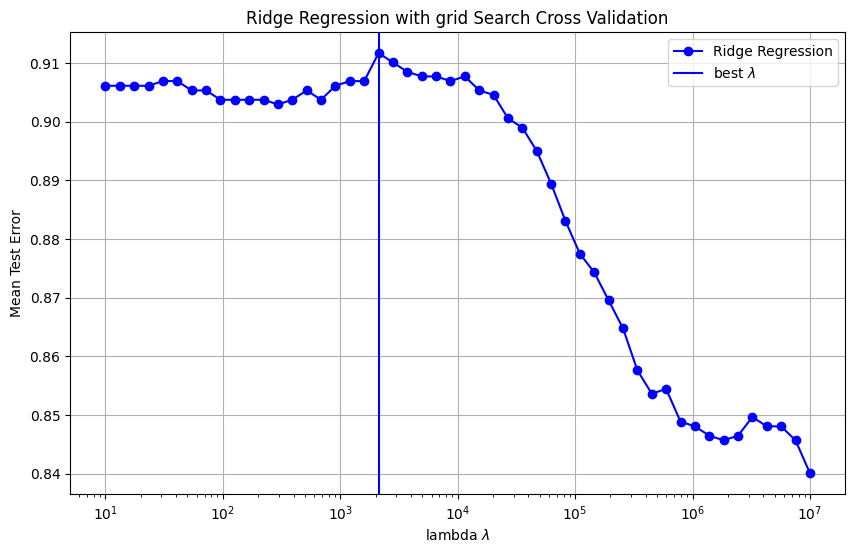

In [229]:
mean_test_ridge = cv_ridge.cv_results_['mean_test_score']

lambda_ = np.logspace(1,7,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_test_ridge, label='Ridge Regression', color = 'blue', marker = 'o')
plt.axvline(2*cv_ridge.best_params_['alpha'], color = 'blue', label = 'best $\lambda$ ')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Ridge Regression with grid Search Cross Validation')
plt.grid()
plt.show()

In [230]:

nbre_step = 50 
SVM = LinearSVC(loss = 'hinge') #take max_iter really big in order to don't have warning of convergence

# Checking the documentation we have C = 1/(lambda) 

parameters_SVM = {'C' :  1/np.logspace(0,4,nbre_step)}

cv_SVM = GridSearchCV(SVM, parameters_SVM, scoring = 'accuracy', cv = 5)
cv_SVM.fit(x_train, y_train)

cvopt_SVM= cv_SVM.best_estimator_
cvopt_SVM.fit(x_train,y_train)

accuracy_SVM = cvopt_SVM.score(x_test, y_test)

print(cvopt_SVM)
print(f"The accuracy on the Test set is : {accuracy_SVM*100:.5f}%")


LinearSVC(C=0.001389495494373139, loss='hinge')
The accuracy on the Test set is : 91.29630%


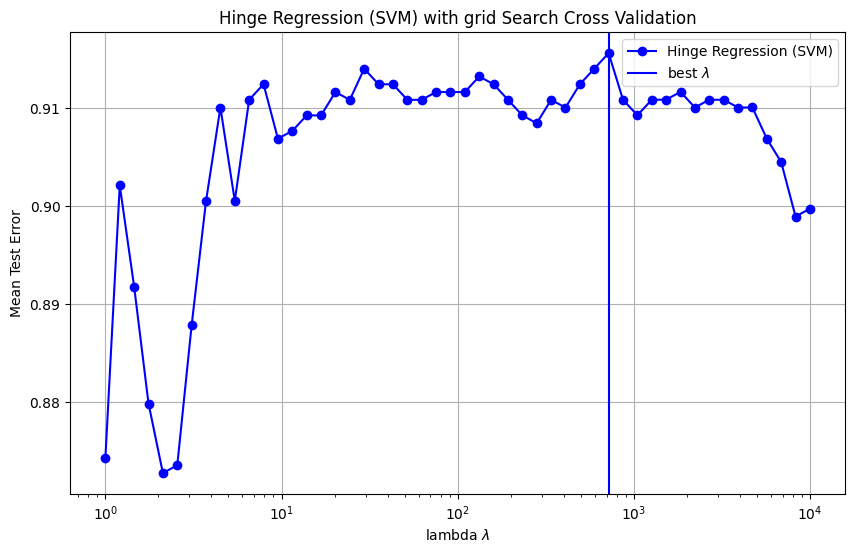

In [231]:
mean_test_SVM = cv_SVM.cv_results_['mean_test_score']

lambda_ = np.logspace(0,4,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_test_SVM, label='Hinge Regression (SVM)', color = 'blue', marker = 'o')
plt.axvline(1/cv_SVM.best_params_['C'], color = 'blue', label = 'best $\lambda$ ')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Hinge Regression (SVM) with grid Search Cross Validation')
plt.grid()
plt.show()

**---------------------------------------------------EXO 1.4 -------------------------------------------------------------**

*4) Random Forest*

In [244]:
nbre_step = 20
RandomForest = RandomForestClassifier(max_depth = 10, min_samples_split = 10)


para_RF ={'n_estimators' : np.logspace(1,4,nbre_step).astype(int)}


cv_RF = GridSearchCV(RandomForest, para_RF, cv = 5)
cv_RF.fit(x_train, y_train)

cvopt_RF= cv_RF.best_estimator_
cvopt_RF.fit(x_train,y_train)

accuracy_RF = cvopt_RF.score(x_test, y_test)

print(cvopt_RF)
print(f"The accuracy on the Test set is : {accuracy_RF*100:.5f}%")


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=545)
The accuracy on the Test set is : 97.40741%


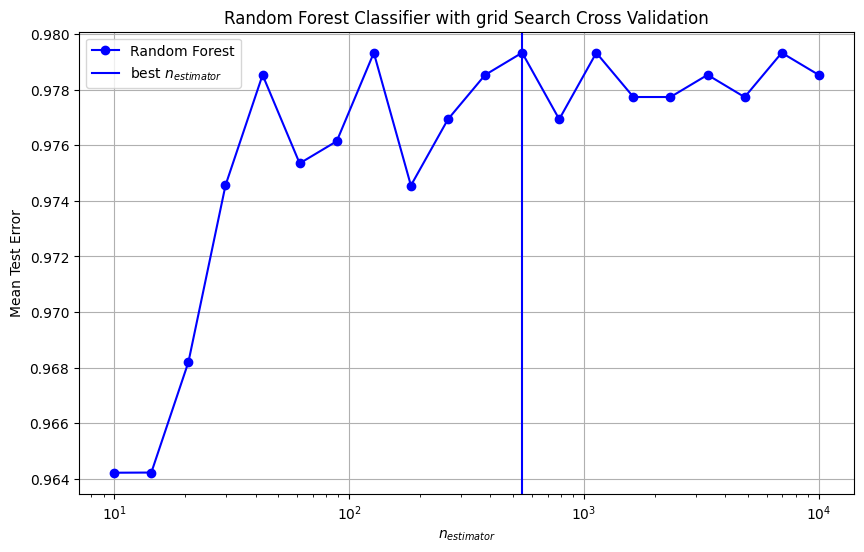

In [245]:
mean_test_RF = cv_RF.cv_results_['mean_test_score']

lambda_ = np.logspace(1,4,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_test_RF, label='Random Forest', color = 'blue', marker = 'o')
plt.axvline(cv_RF.best_params_['n_estimators'], color = 'blue', label = 'best $n_{estimator}$ ')
plt.xlabel('$n_{estimator}$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Random Forest Classifier with grid Search Cross Validation')
plt.grid()
plt.show()

**---------------------------------------------------EXO 1.5 -------------------------------------------------------------**

*5) Random Feature*

In [251]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

LogisticRegression(C=1048.1131341546852, solver='liblinear')
The accuracy on the Test set is : 95.18519%


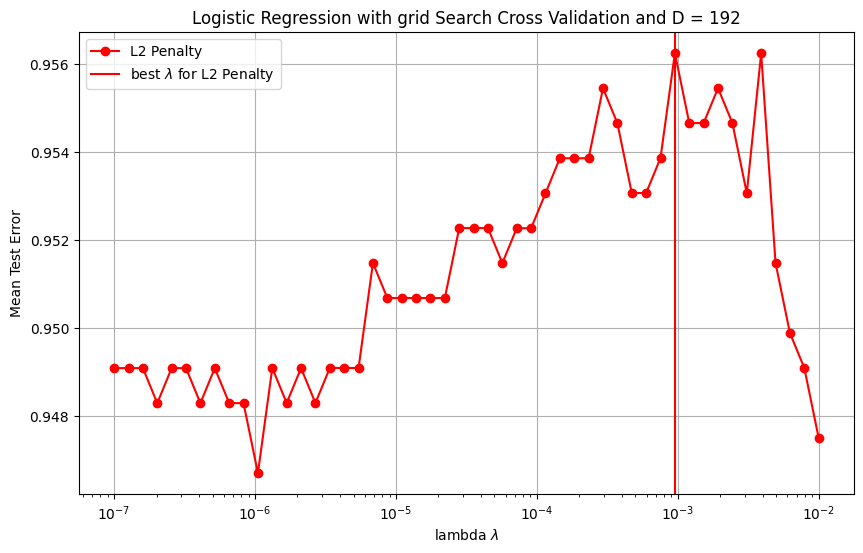

LogisticRegression(C=3393.2217718953298, solver='liblinear')
The accuracy on the Test set is : 95.92593%


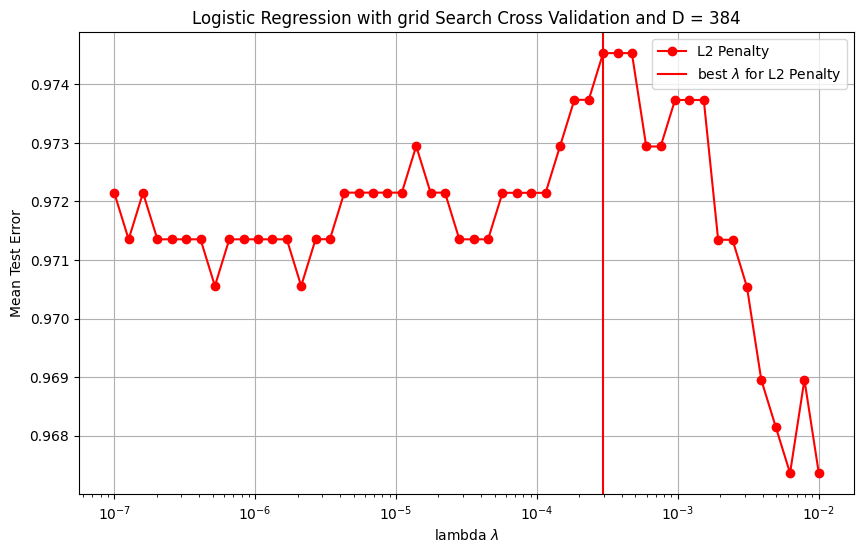

LogisticRegression(C=1930697.7288832497, solver='liblinear')
The accuracy on the Test set is : 98.14815%


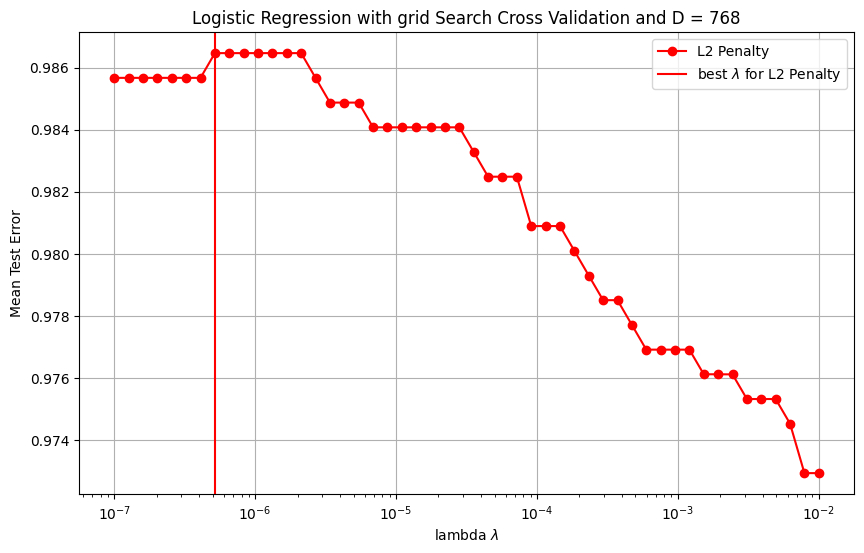

LogisticRegression(C=10000000.0, solver='liblinear')
The accuracy on the Test set is : 98.14815%


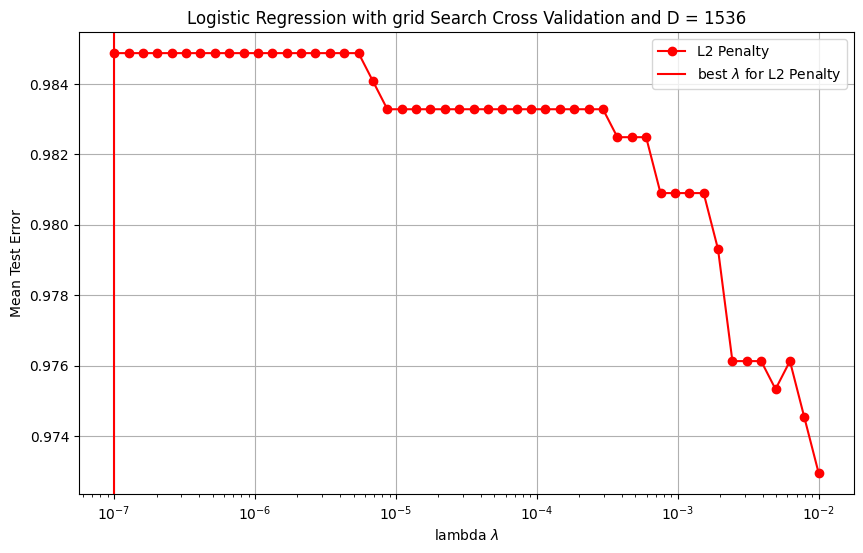

In [254]:
d = x_train.shape[1]

D_new = [3*d, 6*d, 12*d, 24*d]
lambda_ = np.logspace(-7,-2,50)

for D in D_new:
    F = np.random.normal( loc = 0, scale = 1/np.sqrt(d), size = (D,d))
    u_train = 1/np.sqrt(D) * sigmoid(F@x_train.T).T
    u_test = 1/np.sqrt(D) * sigmoid(F@x_test.T).T

    log_reg_l2 = LogisticRegression(penalty = 'l2',solver = 'liblinear')

    parameters_logregl2 = {'C' :  1/(lambda_)}

    cv_logregl2 = GridSearchCV(log_reg_l2, parameters_logregl2, scoring = 'accuracy', cv = 5)
    cv_logregl2.fit(u_train, y_train)

    cvopt_logregl2 = cv_logregl2.best_estimator_
    cvopt_logregl2.fit(u_train,y_train)

    accuracy_logregl2 = cvopt_logregl2.score(u_test, y_test)

    print(cvopt_logregl2)
    print(f"The accuracy on the Test set is : {accuracy_logregl2*100:.5f}%")

    mean_test_l2 = cv_logregl2.cv_results_['mean_test_score']

    plt.figure(figsize= (10,6))
    plt.semilogx(lambda_, mean_test_l2, label='L2 Penalty',  color = 'red', marker = 'o')
    plt.axvline(1/cv_logregl2.best_params_['C'], color = 'red', label = 'best $\lambda$ for L2 Penalty')
    plt.xlabel('lambda $\lambda$')
    plt.ylabel('Mean Test Error')
    plt.legend()
    plt.title('Logistic Regression with grid Search Cross Validation and D = '+str(D))
    plt.grid()
    plt.show()

*We see clearly that increasing the $D$ value we have always an increase of the accurracy too, but after a moment increasing to much don't lead to a big gain of accuraccy*

**Part 2 : Statistical Learning with Nearest-Neighbors**

*1) Show the best estimator*